In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("D:/WorkPath/PycharmProjects/MutTm-pred")
from Dataset.Process4Dataset.DatasetCeator4PonDT import Dataset4MutTm
from MachineLearning.Util import train_validation_test, train_test, test

In [3]:
dataset = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=25,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="add")

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、测试集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了15条非法长度的数据，当前蛋白质长度被限制在(50, 5000)
-删除条875个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了0条非法长度的数据，当前蛋白质长度被限制在(50, 5000)
-删除条16个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.494685649871826
-释放模型后显存用量: 0.008752822875976562
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.008752822875976562
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 344/344 [00:00<00:00, 9700.88it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


In [21]:
Tm = pd.DataFrame(data=pd.concat([dataset.train_feature_set["Tm"], dataset
                                 .test_feature_set["Tm"]]), columns=["Tm"])
Tm

,Tm
0,84.3
1,77.6
2,77.4
3,75.8
4,76.5
...,...
339,42.8
340,50.1
341,50.8
342,44.8


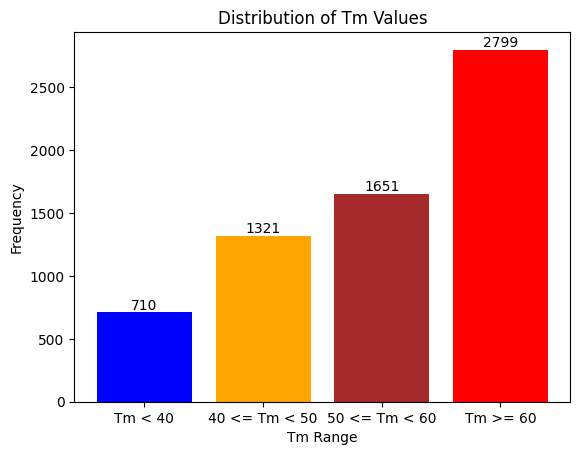

In [29]:
# 计算每部分的数量
count_11 = Tm[Tm["Tm"] >= 60].shape[0]
count_60 = Tm[(Tm["Tm"] >= 50) & (Tm["Tm"] < 60)].shape[0]
count_50 = Tm[(Tm["Tm"] >= 40) & (Tm["Tm"] < 50)].shape[0]
count_20 = Tm[Tm["Tm"] < 40].shape[0]

# 准备绘图数据
data = [count_20, count_50, count_60, count_11]
labels = ["Tm < 40", "40 <= Tm < 50", "50 <= Tm < 60", "Tm >= 60"]

# 绘制柱状图
fig, ax = plt.subplots()
bars = ax.bar(labels, data, color=['blue', 'orange', 'brown', 'red'])

# 在每个柱子上方添加标签
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    
# plt.bar(labels, data, color=['blue', 'orange', 'brown', 'red'])
plt.xlabel('Tm Range')
plt.ylabel('Frequency')
plt.title('Distribution of Tm Values')
plt.show()